# **Extraction des Plus Proches Voisins**

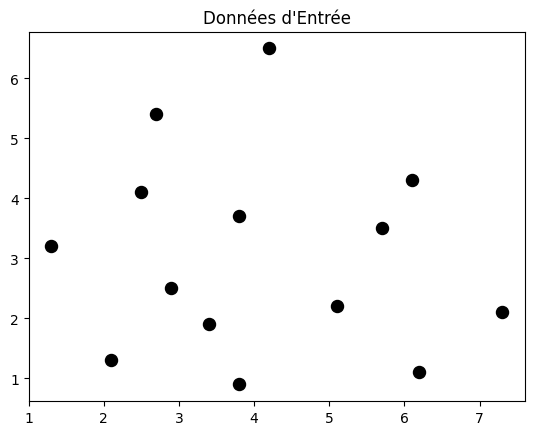


K Plus Proches Voisins :
1 ==> [7.3 2.1]
2 ==> [6.2 1.1]
3 ==> [5.7 3.5]
4 ==> [5.1 2.2]
5 ==> [6.1 4.3]


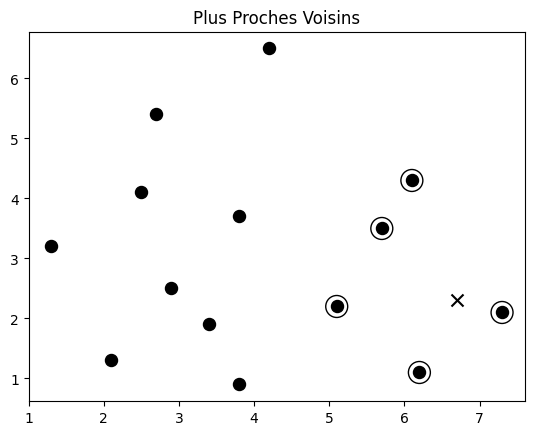

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Données d'entrée
X = np.array([
[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4],
[3.8, 0.9], [7.3, 2.1], [4.2, 6.5], [3.8, 3.7],
[2.5, 4.1], [3.4, 1.9], [5.7, 3.5], [6.1, 4.3],
[5.1, 2.2], [6.2, 1.1]
])

# Nombre de plus proches voisins
k = 5

# Point de données de test
test_data_point = [[6.7, 2.3]]

# Tracer les données d'entrée
plt.figure()
plt.title('Données d\'Entrée')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='black')
plt.show()

# Construire le modèle K Plus Proches Voisins
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = knn_model.kneighbors(test_data_point)

# Afficher les 'k' plus proches voisins
print("\nK Plus Proches Voisins :")
for rank, index in enumerate(indices[0][:k], start=1):
  print(f"{rank} ==> {X[index]}")

# Visualiser les plus proches voisins avec le point de test
plt.figure()
plt.title('Plus Proches Voisins')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:, 0], X[indices][0][:, 1],
            marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_data_point[0][0], test_data_point[0][1],
            marker='x', s=75, color='k')
plt.show()

# **Construction d'un classifier K-Plus Proches Voisins**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


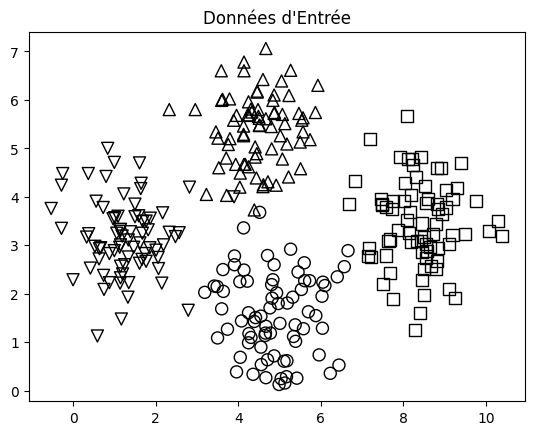

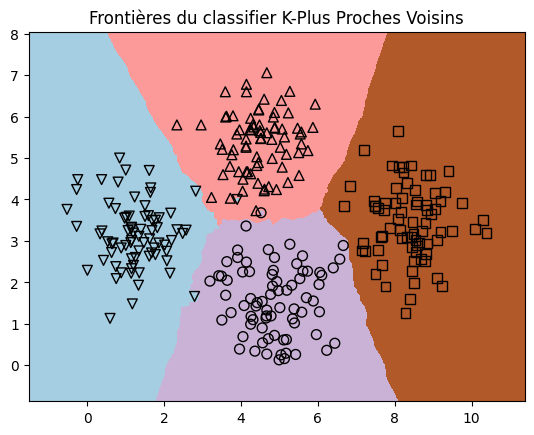

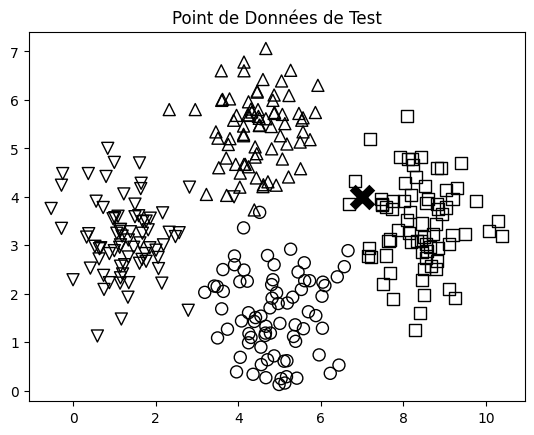

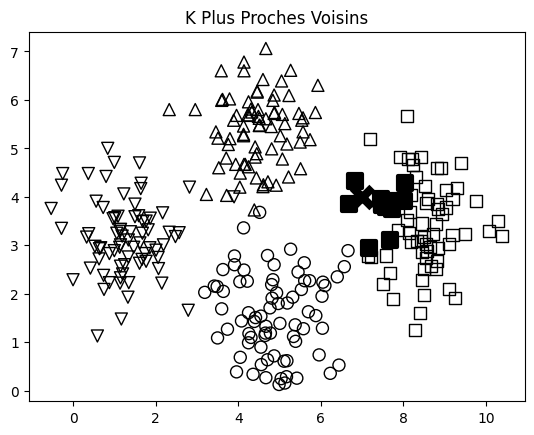

Sortie prédite : 3


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

# Charger les données d'entrée
from google.colab import drive
drive.mount('/content/drive')
input_file = '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)

# Tracer les données d'entrée
plt.figure()
plt.title('Données d\'Entrée')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
s=75, edgecolors='black', facecolors='none')
plt.show()

# Nombre de plus proches voisins
num_neighbors = 12
# Taille des pas de la grille de visualisation
step_size = 0.01

# Créer un modèle de classifier K Plus Proches Voisins
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
# Entraîner le modèle K Plus Proches Voisins
classifier.fit(X, y)

# Créer la grille pour tracer les frontières
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(
np.arange(x_min, x_max, step_size),
np.arange(y_min, y_max, step_size)
)

# Évaluer le classifier sur tous les points de la grille
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualiser la sortie prédite
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)
# Superposer les points d'entraînement sur la carte
for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
    s=50, edgecolors='black', facecolors='none')
# Définir les limites des axes X et Y et ajouter un titre
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('Frontières du classifier K-Plus Proches Voisins')
plt.show()

# Point de données de test
test_data_point = [7, 4]
plt.figure()
plt.title('Point de Données de Test')
for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
    s=75, edgecolors='black', facecolors='none')
plt.scatter(test_data_point[0], test_data_point[1], marker='x',
  linewidth=6, s=200, facecolors='black')
plt.show()

# Extraire les K plus proches voisins
_, indices = classifier.kneighbors([test_data_point])
indices = indices.astype(int)[0]

# Tracer les K plus proches voisins
plt.figure()
plt.title('K Plus Proches Voisins')
for i in indices:
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]],
    linewidth=3, s=100, facecolors='black')

# Superposer le point de test
plt.scatter(test_data_point[0], test_data_point[1], marker='x',
linewidth=6, s=200, facecolors='black')

# Superposer les données d'entrée
for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
    s=75, edgecolors='black', facecolors='none')
plt.show()

print("Sortie prédite :", classifier.predict([test_data_point])[0])

# **Calcul des Scores de Similarité**

In [59]:
import argparse
import json
import numpy as np

%cd '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/'

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Compute similarity score')
    parser.add_argument('--user1', dest='user1', required=True,
            help='First user')
    parser.add_argument('--user2', dest='user2', required=True,
            help='Second user')
    parser.add_argument("--score-type", dest="score_type", required=True,
            choices=['Euclidean', 'Pearson'], help='Similarity metric to be used')
    return parser

# Compute the Euclidean distance score between user1 and user2
def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    # If there are no common movies between the users,
    # then the score is 0
    if len(common_movies) == 0:
        return 0

    squared_diff = []

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))

    return 1 / (1 + np.sqrt(np.sum(squared_diff)))

# Compute the Pearson correlation score between user1 and user2
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies)

    # If there are no common movies between user1 and user2, then the score is 0
    if num_ratings == 0:
        return 0

    # Calculate the sum of ratings of all the common movies
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Calculate the sum of products of the ratings of the common movies
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Calculate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings

    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

from google.colab import drive
drive.mount('/content/drive')

if __name__=='__main__':
    args = build_arg_parser().parse_args()
    user1 = args.user1
    user2 = args.user2
    score_type = args.score_type

    ratings_file = '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/ratings.json'


    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    if score_type == 'Euclidean':
        print("\nEuclidean score:")
        print(euclidean_score(data, user1, user2))
    else:
        print("\nPearson score:")
        print(pearson_score(data, user1, user2))


/content/drive/My Drive/Colab-Notebooks/lab3-scripts
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


usage: colab_kernel_launcher.py [-h] --user1 USER1 --user2 USER2 --score-type {Euclidean,Pearson}
colab_kernel_launcher.py: error: the following arguments are required: --user1, --user2, --score-type


SystemExit: 2

In [65]:
!python3 '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/compute_scores.py' --user1 "Samuel Miller" --user2 "Brenda Peterson" --score-type Pearson



Pearson score:
-0.9299279982188647


# ***Filtrage Collaboratif ***

In [67]:
import argparse
import json
import numpy as np

%cd '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/'

from compute_scores import pearson_score

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Find users who are similar to the input user')
    parser.add_argument('--user', dest='user', required=True,
            help='Input user')
    return parser

# Finds users in the dataset that are similar to the input user
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('Cannot find ' + user + ' in the dataset')

    # Compute Pearson score between input user
    # and all the users in the dataset
    scores = np.array([[x, pearson_score(dataset, user,
            x)] for x in dataset if x != user])

    # Sort the scores in decreasing order
    scores_sorted = np.argsort(scores[:, 1])[::-1]

    # Extract the top 'num_users' scores
    top_users = scores_sorted[:num_users]

    return scores[top_users]

if __name__=='__main__':
    args = build_arg_parser().parse_args()
    user = args.user

    ratings_file = 'ratings.json'

    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    print('\nUsers similar to ' + user + ':\n')
    similar_users = find_similar_users(data, user, 3)
    print('User\t\t\tSimilarity score')
    print('-'*41)
    for item in similar_users:
        print(item[0], '\t\t', round(float(item[1]), 2))



/content/drive/My Drive/Colab-Notebooks/lab3-scripts


usage: colab_kernel_launcher.py [-h] --user USER
colab_kernel_launcher.py: error: the following arguments are required: --user


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [69]:
! python3 collaborative_filtering.py --user "Adam Cohen"


Users similar to Adam Cohen:

User			Similarity score
-----------------------------------------
David Smith 		 0.91
Bill Duffy 		 0.86
Samuel Miller 		 0.8


# **Système de Recommandation de Films**

In [ ]:
import argparse
import json
import numpy as np
%cd '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/'
from compute_scores import pearson_score
from collaborative_filtering import find_similar_users

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Find the movie recommendations for the given user')
    parser.add_argument('--user', dest='user', required=True,
            help='Input user')
    return parser

# Get movie recommendations for the input user
def get_recommendations(dataset, input_user):
    if input_user not in dataset:
        raise TypeError('Cannot find ' + input_user + ' in the dataset')

    overall_scores = {}
    similarity_scores = {}

    for user in [x for x in dataset if x != input_user]:
        similarity_score = pearson_score(dataset, input_user, user)

        if similarity_score <= 0:
            continue

        filtered_list = [x for x in dataset[user] if x not in \
                dataset[input_user] or dataset[input_user][x] == 0]

        for item in filtered_list:
            overall_scores.update({item: dataset[user][item] * similarity_score})
            similarity_scores.update({item: similarity_score})

    if len(overall_scores) == 0:
        return ['No recommendations possible']

    # Generate movie ranks by normalization
    movie_scores = np.array([[score/similarity_scores[item], item]
            for item, score in overall_scores.items()])

    # Sort in decreasing order
    movie_scores = movie_scores[np.argsort(movie_scores[:, 0])[::-1]]

    # Extract the movie recommendations
    movie_recommendations = [movie for _, movie in movie_scores]

    return movie_recommendations

if __name__=='__main__':
    args = build_arg_parser().parse_args()
    user = args.user

    ratings_file = 'ratings.json'

    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    print("\nMovie recommendations for " + user + ":")
    movies = get_recommendations(data, user)
    for i, movie in enumerate(movies):
        print(str(i+1) + '. ' + movie)



In [78]:
%cd '/content/drive/My Drive/Colab-Notebooks/lab3-scripts/'
! python3 movie_recommender.py --user "Brenda Peterson"

/content/drive/My Drive/Colab-Notebooks/lab3-scripts

Movie recommendations for Brenda Peterson:
1. No recommendations possible
